In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, models, layers
import matplotlib.pyplot as plt

In [3]:
# 1. Input
input_img = Input(shape=(28, 28, 1), name="input")

In [4]:
# 2. FCN Autoencoder (Flatten + Dense)
x1 = layers.Flatten()(input_img)                # (None, 784)
x1 = layers.Dense(128, activation='relu')(x1)
x1 = layers.Dense(64, activation='relu')(x1)
x1 = layers.Dense(32, activation='relu')(x1)

x1 = layers.Dense(64, activation='relu')(x1)
x1 = layers.Dense(128, activation='relu')(x1)
x1 = layers.Dense(784, activation='sigmoid')(x1)
decoded_fc = x1  # shape: (None, 784)

I0000 00:00:1750522509.136397   40278 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9917 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:02:00.0, compute capability: 8.9


In [5]:
# 3. CNN Autoencoder
x2 = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2)(input_img)   # 14x14x32
x2 = layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)(x2)           # 7x7x8

x2 = layers.Conv2DTranspose(8, (3,3), activation='relu', padding='same', strides=2)(x2)  # 14x14x8
x2 = layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same', strides=2)(x2) # 28x28x32
x2 = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x2)                   # 28x28x1
decoded_cnn = layers.Flatten()(x2)  # shape: (None, 784)

In [6]:
# 4. Merge
merged = decoded_fc + decoded_cnn  # shape: (None, 784)
merged_output = layers.Reshape((28, 28, 1))(merged)

In [7]:
# 5. Modeling
model = Model(inputs=input_img, outputs=merged_output, name="AE_Merged")
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "AE_Merged"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 28, 28, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    100,480 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │        320 │ input[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 8)   │      2,312 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 14, 14, 8) │        584 │ conv2d_1[0][0]    │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      2,112 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 28, 28,    │      2,336 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      8,320 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28, 1) │        289 │ conv2d_transpose… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 784)       │    101,136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 784)       │          0 │ dense_5[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 28, 28, 1) │          0 │ add[0][0]         │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 228,225 (891.50 KB)

 Trainable params: 228,225 (891.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 6. Load data & training
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]  # (60000, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
decoded_img = model.predict(x_test) # (10000, 28, 28, 1)

Epoch 1/10


I0000 00:00:1750522520.029566   40417 service.cc:152] XLA service 0x77b230025660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750522520.029583   40417 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-06-22 01:15:20.059017: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750522520.245241   40417 cuda_dnn.cc:529] Loaded cuDNN version 90701
2025-06-22 01:15:20.612441: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_510', 12 bytes spill stores, 12 bytes spill loads

2025-06-22 01:15:20.891838: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

 51/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5072

I0000 00:00:1750522525.109288   40417 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


221/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2358

2025-06-22 01:15:26.387364: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_510', 12 bytes spill stores, 12 bytes spill loads

2025-06-22 01:15:26.455524: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_510', 164 bytes spill stores, 168 bytes spill loads

2025-06-22 01:15:26.740308: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_531', 144 bytes spill stores, 144 bytes spill loads

2025-06-22 01:15:26.771292: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_510', 132 bytes spill stores, 132 bytes spill loads

2025-06-22 01:15:27.170298: I external

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2272

2025-06-22 01:15:31.443352: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_103', 8 bytes spill stores, 8 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.2266 - val_loss: 0.0082
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0033
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0011


2025-06-22 01:15:40.198268: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_78', 12 bytes spill stores, 12 bytes spill loads

2025-06-22 01:15:40.737363: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_78', 4 bytes spill stores, 4 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [9]:
def show_reconstructions(x_test, decoded_img, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n): # n개의 이미지 출력 준비
        # 입력 이미지
        ax = plt.subplot(2, n, i + 1) # plt.subplot(rows, cols, index) : 전체 그림을 rows행 cols열로 나누고, 그 중 index번째 칸에 그린다는 의미
        plt.imshow(x_test[i].squeeze(), cmap="gray") # imshow()는 2D 형식으로 받아야 하므로 (28, 28, 1)이던 shape을 마지막 채널 축(1)을 제거하여 (28, 28)로 조정
        plt.axis("off") # 축 눈금을 제거해서 이미지만 깔끔하게 보이도록 함

        # 재구성 이미지
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_img[i].squeeze(), cmap="gray")
        plt.axis("off")
    plt.show()


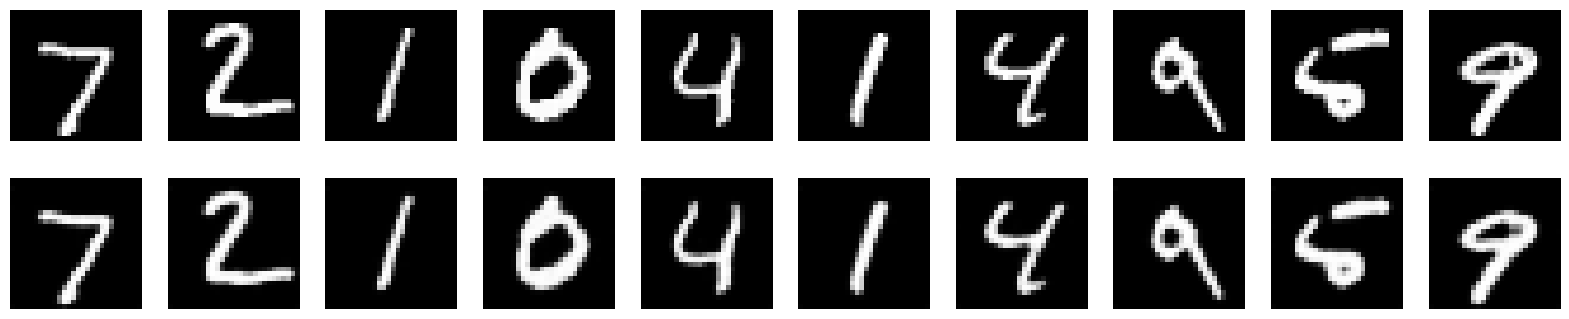

In [10]:
show_reconstructions(x_test, decoded_img)